<a href="https://colab.research.google.com/github/harpuneet-k/Celebal-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('Solarize_Light2')
file_path = '/content/Enhanced_pizza_sell_data_2024-25.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-null   object        
 11  Payment Method                

<Axes: xlabel='Restaurant Name', ylabel='Count'>

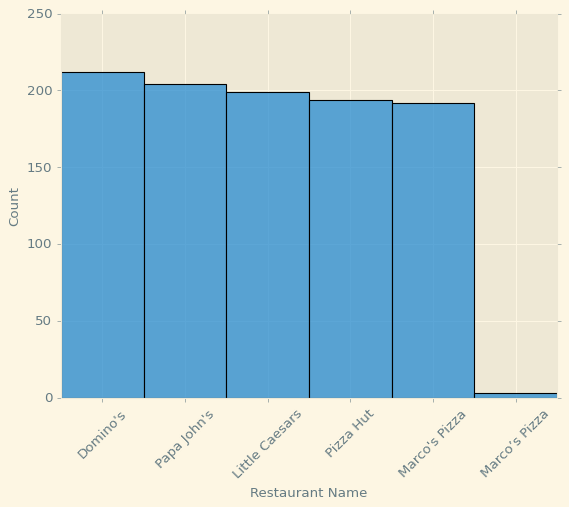

In [ ]:
plt.figure(figsize = (8, 6))
plt.xticks(rotation = 45)
sns.histplot(df['Restaurant Name'])

<Axes: xlabel=' ', ylabel='Delivery Duration (min)'>

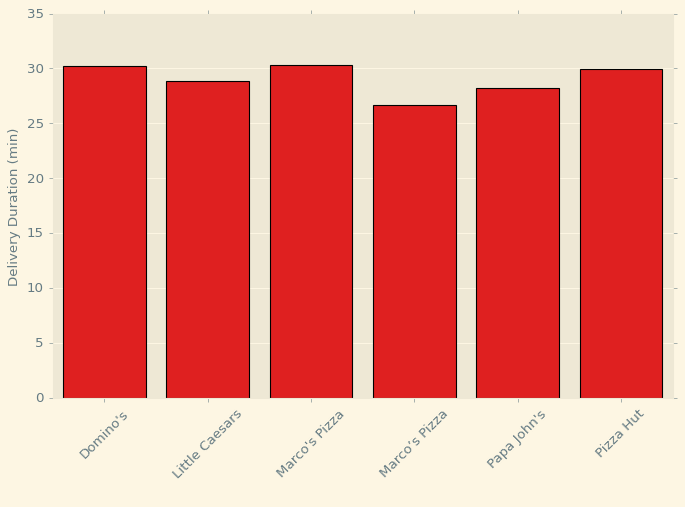

In [ ]:
mean_delivery_time = df.groupby('Restaurant Name')['Delivery Duration (min)'].mean().reset_index()
mean_delivery_time = df.groupby('Restaurant Name')['Delivery Duration (min)'].mean().reset_index()
plt.figure(figsize = (10, 6))
plt.xticks(rotation = 45)
plt.xlabel(' ')
sns.barplot(data = mean_delivery_time, x = 'Restaurant Name', y = 'Delivery Duration (min)', color = 'r')

([<matplotlib.patches.Wedge at 0x7c37c96535d0>,
 [Text(1.0074961327546752, 0.4415331725752598, 'Small'),
  Text(-0.6189749617332974, 0.9093239228939616, 'Medium'),
  Text(-0.47904320974897213, -0.9902108882421978, 'Large'),
  Text(0.8854468919429802, -0.6526743457104137, 'XL')],
 [Text(0.5495433451389137, 0.24083627595014168, '13.15%'),
  Text(-0.3376227063999804, 0.4959948670330699, '42.73%'),
  Text(-0.2612962962267121, -0.5401150299502897, '23.90%'),
  Text(0.48297103196889823, -0.35600418856931654, '20.22%')])

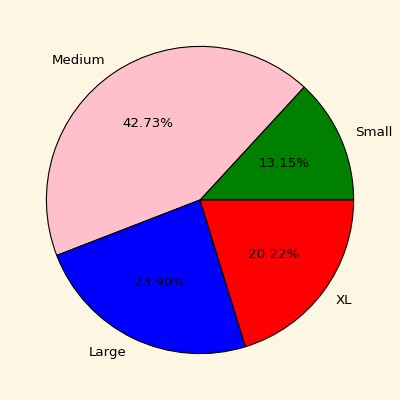

In [27]:
medium = df['Pizza Size'].value_counts()['Medium']
large = df['Pizza Size'].value_counts()['Large']
small = df['Pizza Size'].value_counts()['Small']
xl = df['Pizza Size'].value_counts()['XL']
labels = ['Small', 'Medium', 'Large', 'XL']
values = [small, medium, large, xl]
colors = ['green', 'pink', 'blue', 'red']

plt.figure(figsize = (10, 6))
plt.pie(values, labels = labels, autopct = '%1.2f%%', colors = colors)

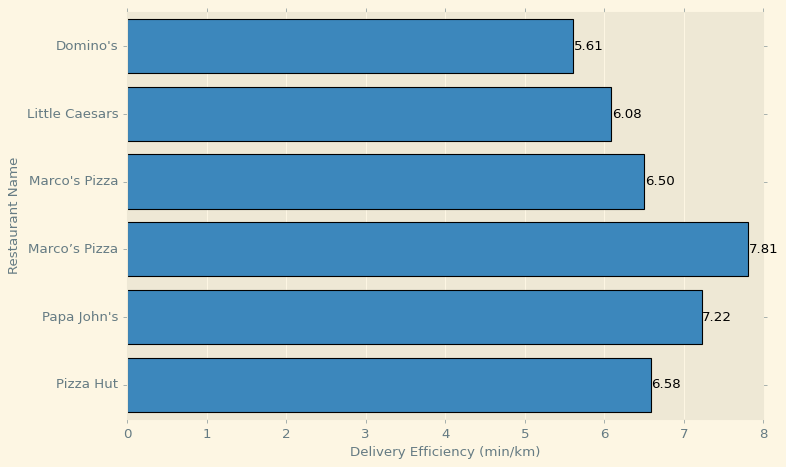

In [ ]:
mean_efficiency = df.groupby('Restaurant Name')['Delivery Efficiency (min/km)'].mean().reset_index()
plt.figure(figsize = (10, 6))

ax = sns.barplot(data=mean_efficiency,
                 x='Delivery Efficiency (min/km)',
                 y='Restaurant Name')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01,
            p.get_y() + p.get_height()/2,
            f'{width:.2f}',
            ha='left',
            va='center')

plt.tight_layout()
plt.show()

<Axes: xlabel=' ', ylabel='Toppings Count'>

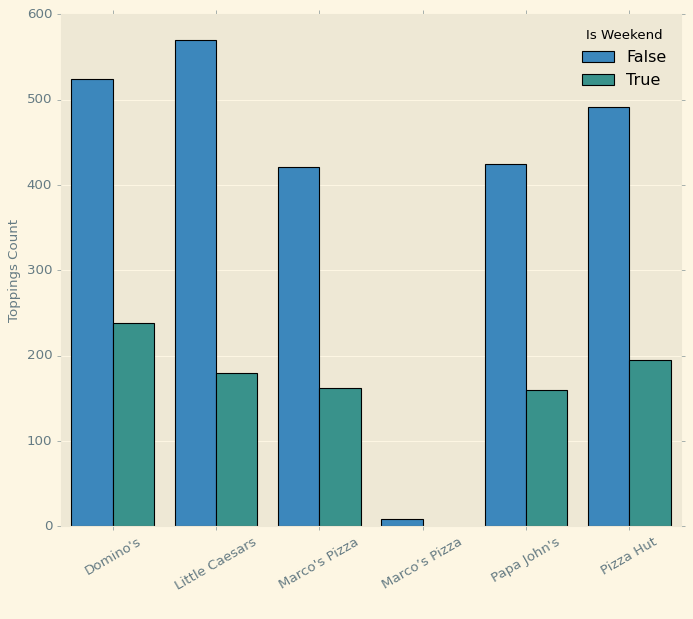

In [ ]:
restaurant_and_topping = df.groupby(['Restaurant Name', 'Is Weekend'])['Toppings Count'].sum().reset_index()

plt.figure(figsize = (10, 8))
plt.xticks(rotation = 30)

plt.xlabel(' ')
sns.barplot(data = restaurant_and_topping, x = 'Restaurant Name', y = 'Toppings Count', hue = 'Is Weekend')

<Axes: xlabel='Distance (km)', ylabel='Delivery Efficiency (min/km)'>

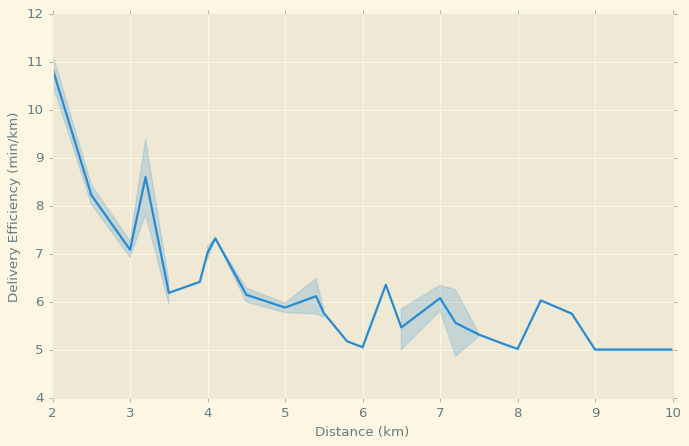

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Distance (km)', y = 'Delivery Efficiency (min/km)')